<img src="../../logo_UTN.svg" align="right" width="150" /> 

##

***

## (950431) Teoría de Circuitos II

***

#### Profesor: Mariano Llamedo Soria  <llamedom@frba.utn.edu.ar>
#### Jefe de TPs: César Fuoco  <cfuoco@frba.utn.edu.ar>
#### Ayudante de TPs: Israel Pavelek <pavel@frba.utn.edu.ar>

####
***

# Trabajo Semanal # 2

#### Autor: *Moharos, David Santiago* <dmoharos@frba.utn.edu.ar>

####

***


####

### Para la siguiente red se pide:

####

<img src="./TS2_Imagen_Circuito_SIN_Valores.png" style="margin-left:auto; margin-right:auto"/>

***
***
####

### 1. Hallar la transferencia T= Vo/Vi en función de ω_0 y Q

### 2. Obtener el valor de los componentes del circuito de forma tal que ω_0= 1 y Q= 3

### 3. Ajustar el valor de R1 de forma tal que |T(0)|= 20dB

####

***
***

####

In [38]:
from IPython.display import IFrame
IFrame("./TS2_Análisis_Ppal.pdf", width= 1000, height= 3475)

####
***
#### Simulación de transferencia (módulo y fase), diagrama de polos y ceros y retardo de grupo
***
####

(3,
 <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>)

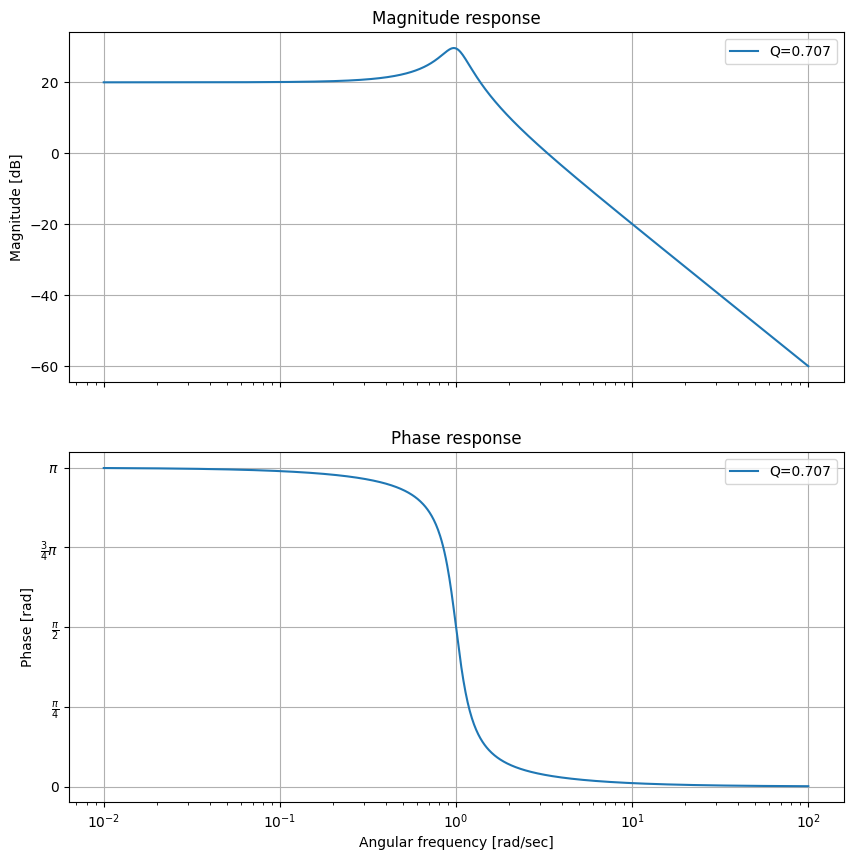

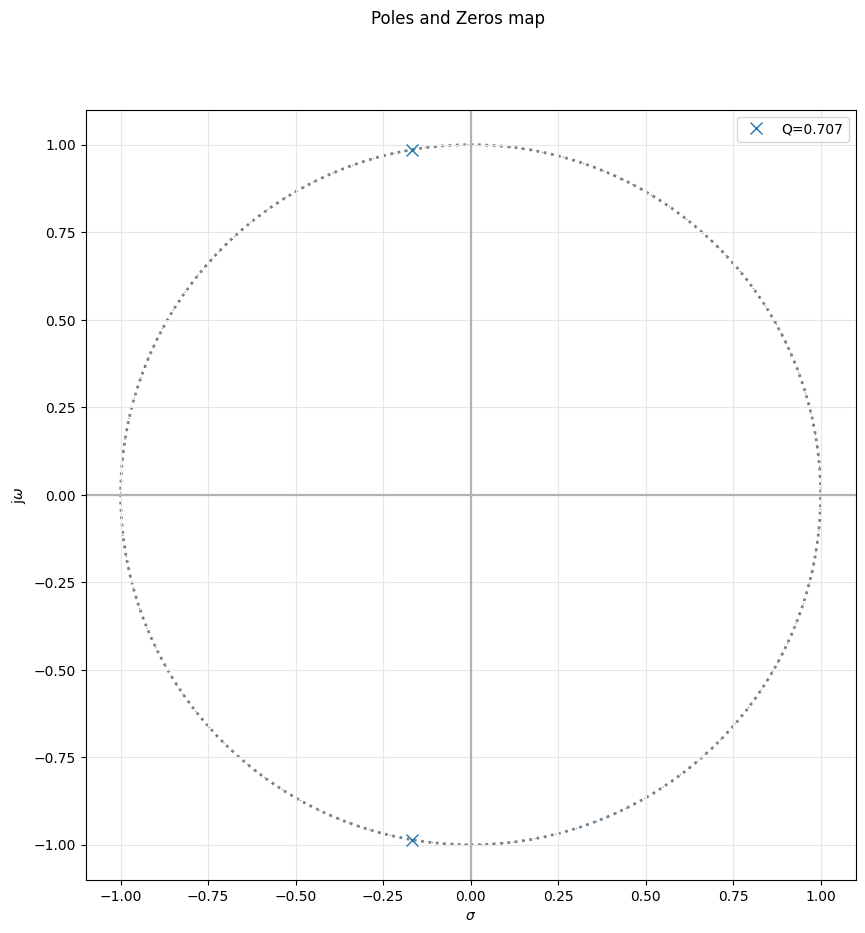

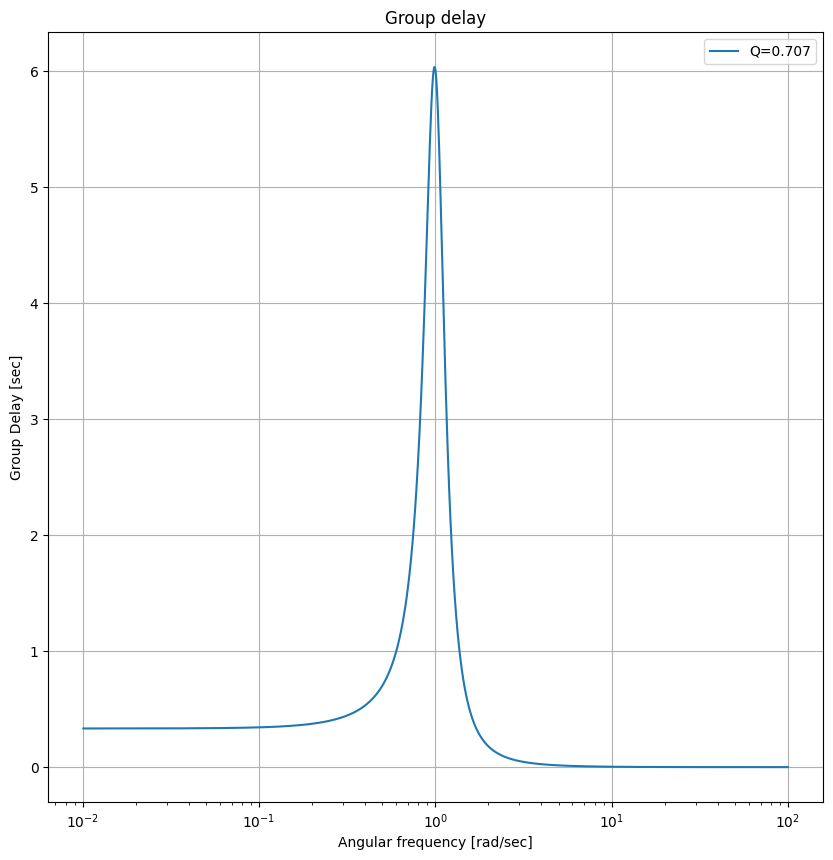

In [85]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#------------------------------------------------------------------------------------------------------------------------------------#
#                                               -- Inicialización de librerías --                                                    #
#------------------------------------------------------------------------------------------------------------------------------------#

from scipy.signal import TransferFunction
from scipy import signal as sig
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

#------------------------------------------------------------------------------------------------------------------------------------#
#                                         -- Configuración para visualización de gráficos --                                         #
#------------------------------------------------------------------------------------------------------------------------------------#

mpl.rcParams['figure.figsize'] = (10,10)
fig_sz_x= 14
fig_sz_y= 13
fig_dpi= 80 # dpi
fig_font_size= 10
plt.rcParams.update({'font.size':fig_font_size})

#------------------------------------------------------------------------------------------------------------------------------------#
#                                                -- Declaración de variables --                                                      #
#------------------------------------------------------------------------------------------------------------------------------------#

Q= 3                    #-- Condición del punto 2 --
ω_0= 1                  #-- Condición del punto 2 --

R1= R3/10               #-- Surge de la condición del punto 3 --
R2= Q*R3            
R3= 10e3
R4= 10e3
C= 100e-6

k= 1/(R1*R3*C**2)

#------------------------------------------------------------------------------------------------------------------------------------#
#                                                       -- Gráficos --                                                               #
#                       -- Transferencia (módulo y fase), diagramas de polos y ceros y retardo de grupo --                           #
#------------------------------------------------------------------------------------------------------------------------------------#

my_tf = TransferFunction( [-k], [1, ω_0/Q, ω_0**2] )

plt.close('all')

bodePlot(my_tf, fig_id=1, filter_description = 'Q={:3.3f}'.format(qq) )
pzmap(my_tf, fig_id=2, filter_description = 'Q={:3.3f}'.format(qq))
GroupDelay(my_tf, fig_id=3, filter_description = 'Q={:3.3f}'.format(qq))
    
#------------------------------------------------------------------------------------------------------------------------------------#


***
***
### Bonus

***
***
####

### +10 💎 Obtener los valores de la red normalizados en frecuencia e impedancia.

### +10 🎓 Calcular las sensibilidades S_ωo_C, S_Q_R2 y S_Q_R3

####

***
***

####

In [60]:
from IPython.display import IFrame
IFrame("./TS2_Análisis_Bonus.pdf", width= 1000, height= 3100)

###
***
#### Podemos observar que los parámetros $\begin{equation}ω_0\end{equation}$ y Q son muy sensibles respecto a los resistores y capacitores: la variación de dichos componentes se ve reflejada de forma directa en la sensibilidad de los parámetros en cuestión.
#### El signo (-) simplemente denota el cambio en la variación: cuando uno aumenta, el otro disminuye y viceversa.
***
### 

***
***

####

### +10 🤯 Recalcular los valores de la red para que cumpla con una transferencia Butterworth.

####

***
***
####

In [61]:
from IPython.display import IFrame
IFrame("./TS2_Análisis_Bonus_2.pdf", width= 1000, height= 1100)

####
***
#### Simulación de transferencia (módulo y fase), diagrama de polos y ceros y retardo de grupo
***
####

(3,
 <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>)

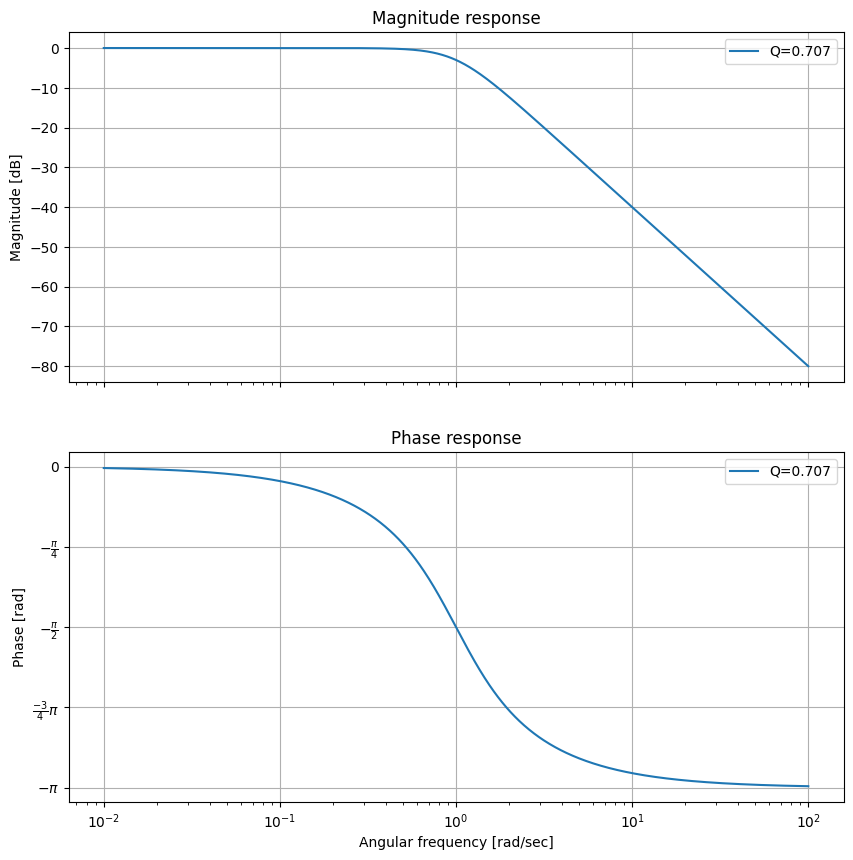

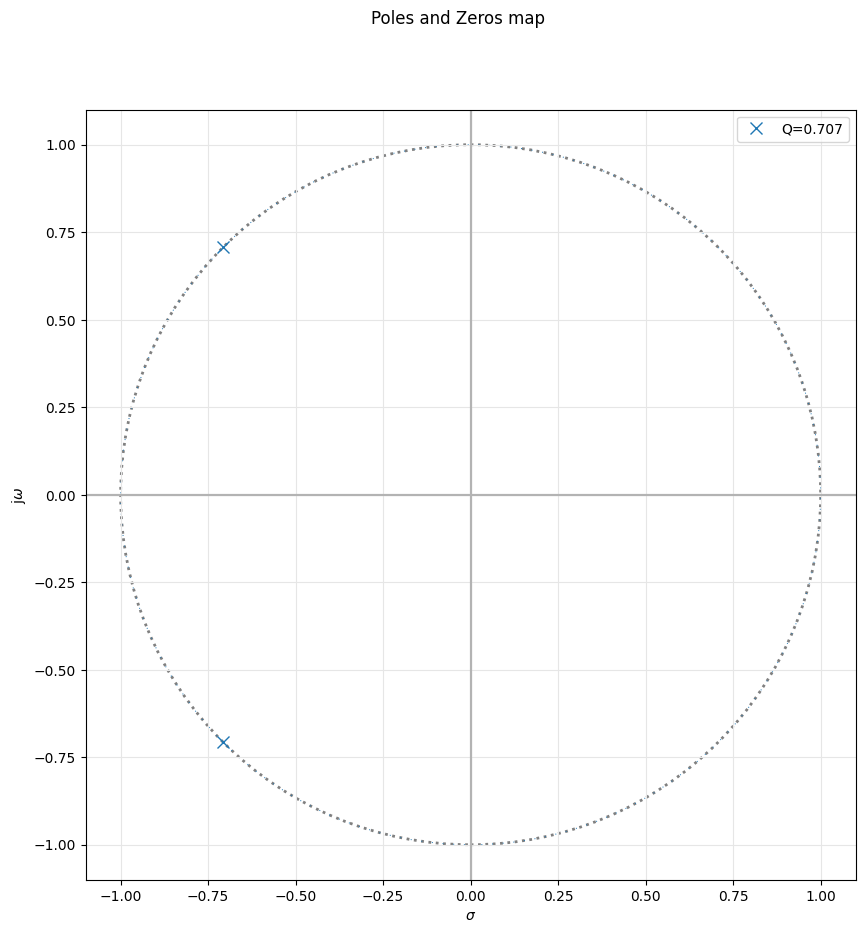

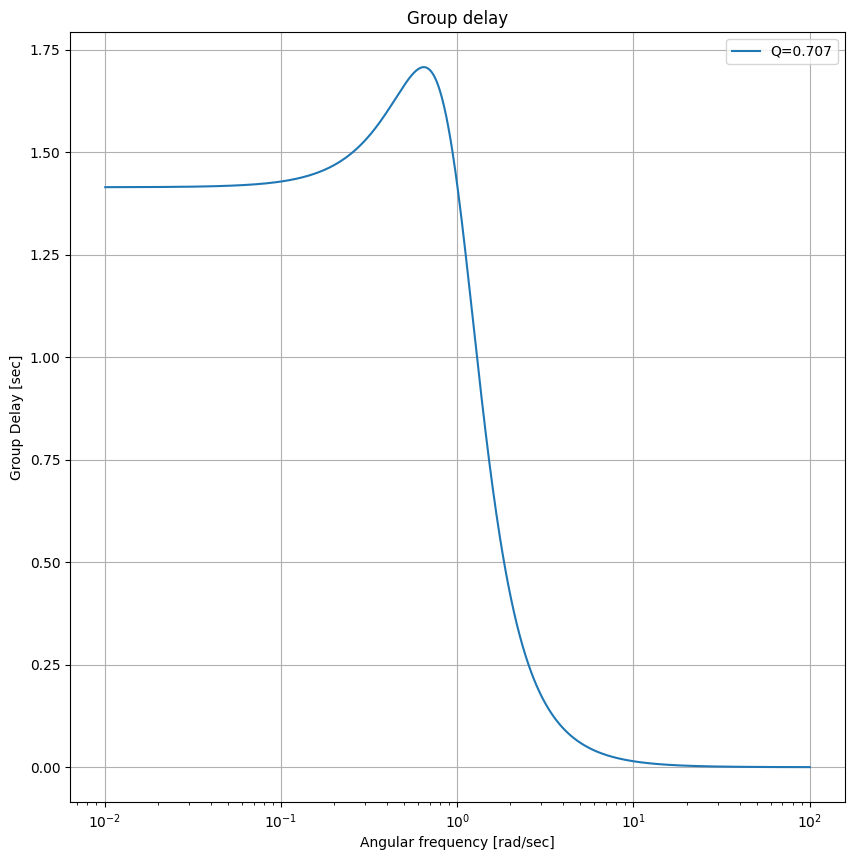

In [80]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#------------------------------------------------------------------------------------------------------------------------------------#
#                                               -- Inicialización de librerías --                                                    #
#------------------------------------------------------------------------------------------------------------------------------------#

from scipy.signal import TransferFunction
from scipy import signal as sig
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

#------------------------------------------------------------------------------------------------------------------------------------#
#                                         -- Configuración para visualización de gráficos --                                         #
#------------------------------------------------------------------------------------------------------------------------------------#

mpl.rcParams['figure.figsize'] = (10,10)
fig_sz_x= 14
fig_sz_y= 13
fig_dpi= 80 # dpi
fig_font_size= 10
plt.rcParams.update({'font.size':fig_font_size})

#------------------------------------------------------------------------------------------------------------------------------------#
#                                                -- Declaración de variables --                                                      #
#------------------------------------------------------------------------------------------------------------------------------------#

#-- Valores de componentes --
R1= 10e3
R2= (np.sqrt(2)/2)*R3
R3= 10e3
R4= 10e3
C= 100e-6

#-- Norma de impedancia --
Ω_z= R3

#-- Valores de componentes normalizados--
R1_n= R1/Ω_z
R2_n= R2/Ω_z
R3_n= R3/Ω_z
R4_n= R4/Ω_z
C_n= C*Ω_z 

#-- Características de la transferencia --
qq= ω_0/np.sqrt(2)
ω_0= 1/(R3*C)

#-- Norma de pulsación --
Ω_ω= ω_0

#-- Características de la transferencia normalizadas--
ω_0_n= ω_0/Ω_ω

#------------------------------------------------------------------------------------------------------------------------------------#
#                                                       -- Gráficos --                                                               #
#                       -- Transferencia (módulo y fase), diagramas de polos y ceros y retardo de grupo --                           #
#------------------------------------------------------------------------------------------------------------------------------------#

my_tf = TransferFunction( [1], [1, ω_0/qq, ω_0**2] )

plt.close('all')

bodePlot(my_tf, fig_id=1, filter_description = 'Q={:3.3f}'.format(qq) )
pzmap(my_tf, fig_id=2, filter_description = 'Q={:3.3f}'.format(qq))
GroupDelay(my_tf, fig_id=3, filter_description = 'Q={:3.3f}'.format(qq))
    
#------------------------------------------------------------------------------------------------------------------------------------#

***
***
####

### +10  🎸 Cómo podría obtener un circuito pasabanda con los mismos componentes originales y con qué parámetros quedaría diseñado (Ver ejemplo 4.6 en Schaumann).

####
***
***

***
#### Tomando como referencia el diagrama en bloques de un filtro de segundo orden, observamos que podemos obtener la respuesta de un filtro pasabanda si tomamos la transferencia $\begin{equation}T_B(s)= \frac{V_B}{Vin}\end{equation}$, a la salida del primer integrador.
***

####

<img src="./TS2_Diagrama_de_bloques_Schaumann.png" style="margin-left:auto; margin-right:auto"/>

####

***
###### *"Design of Analog Filters"*, Cáp.4.2: "The Second-Order Circuit", Pág.132 - Schaumann, Van Valkenburg
***
#####

***
#### Realizando un análisis similar al anterior, obtenemos la transferencia que precisamos:
***
#####

In [70]:
from IPython.display import IFrame
IFrame("./TS2_Análisis_Bonus_3.pdf", width= 1000, height= 4375)

####
***
#### Simulación de transferencia (módulo y fase), diagrama de polos y ceros y retardo de grupo
***
####

(3,
 <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>)

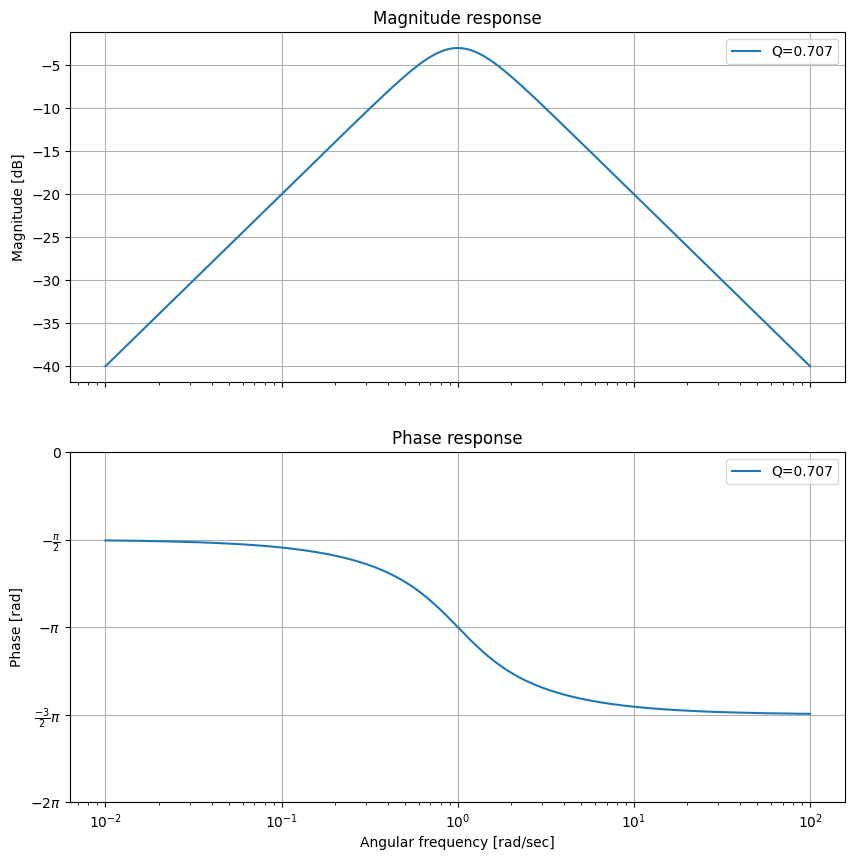

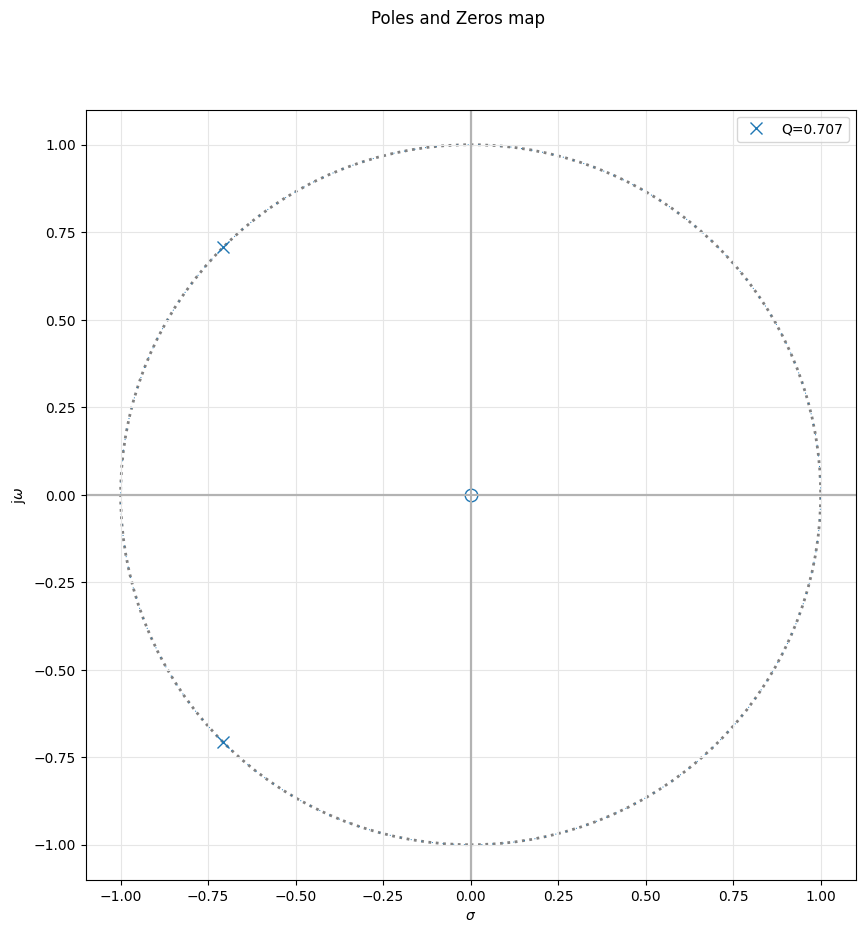

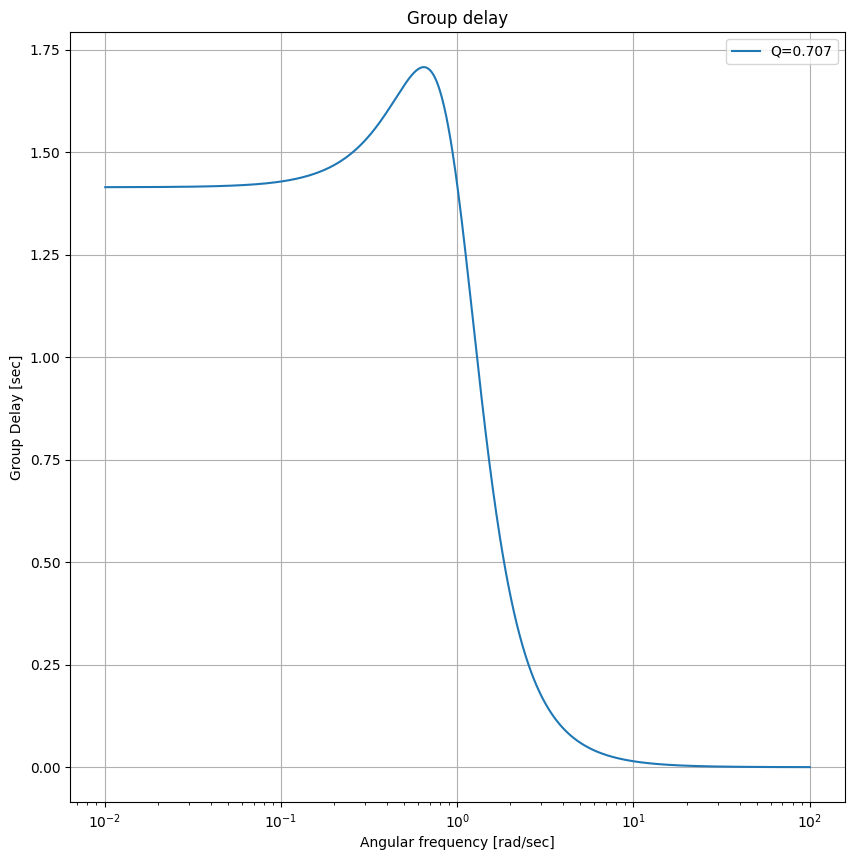

In [81]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#------------------------------------------------------------------------------------------------------------------------------------#
#                                               -- Inicialización de librerías --                                                    #
#------------------------------------------------------------------------------------------------------------------------------------#

from scipy.signal import TransferFunction
from scipy import signal as sig
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

#------------------------------------------------------------------------------------------------------------------------------------#
#                                         -- Configuración para visualización de gráficos --                                         #
#------------------------------------------------------------------------------------------------------------------------------------#

mpl.rcParams['figure.figsize'] = (10,10)
fig_sz_x= 14
fig_sz_y= 13
fig_dpi= 80 # dpi
fig_font_size= 10
plt.rcParams.update({'font.size':fig_font_size})

#------------------------------------------------------------------------------------------------------------------------------------#
#                                                -- Declaración de variables --                                                      #
#------------------------------------------------------------------------------------------------------------------------------------#

#-- Valores de componentes --
R1= 10e3
R2= (np.sqrt(2)/2)*R3
R3= 10e3
R4= 10e3
C= 100e-6

#-- Norma de impedancia --
Ω_z= R3

#-- Valores de componentes normalizados--
R1_n= R1/Ω_z
R2_n= R2/Ω_z
R3_n= R3/Ω_z
R4_n= R4/Ω_z
C_n= C*Ω_z 

#-- Características de la transferencia --
k= 1/(R1*C)
qq= R2/R3
ω_0= 1/(R3*C)

#-- Norma de pulsación --
Ω_ω= ω_0

#-- Características de la transferencia normalizadas--
ω_0_n= ω_0/Ω_ω

#------------------------------------------------------------------------------------------------------------------------------------#
#                                                       -- Gráficos --                                                               #
#                       -- Transferencia (módulo y fase), diagramas de polos y ceros y retardo de grupo --                           #
#------------------------------------------------------------------------------------------------------------------------------------#

my_tf = TransferFunction( [-k, 0], [1, ω_0/qq, ω_0**2] )

plt.close('all')

bodePlot(my_tf, fig_id=1, filter_description = 'Q={:3.3f}'.format(qq_n) )
pzmap(my_tf, fig_id=2, filter_description = 'Q={:3.3f}'.format(qq_n))
GroupDelay(my_tf, fig_id=3, filter_description = 'Q={:3.3f}'.format(qq_n))
    
#------------------------------------------------------------------------------------------------------------------------------------#

####
***
***
####
### +10  ⚽️ Simulación circuital de todos los experimentos.
####
***
***
####

<img src="./TS2_Imagen_Circuito_AMBAS_Salidas.png" style="margin-left:auto; margin-right:auto"/>

####
***
#### Simulación en LTSpice de la respuesta en frecuencia (módulo y fase) de la transferencia $\begin{equation}T_L(s)= \frac{Vo1}{Vin}\end{equation}$:
***
####

<img src="./TS2_Simulacion_LTSpice_Vo1_general.png" style="margin-left:auto; margin-right:auto"/>

#####
***
#### Como se puede observar, y tal como habíamos obtenido analíticamente y por medio de la simulación en Python, el circuito se trata de un filtro pasabajos de segundo orden.
***
#####

<img src="./TS2_Simulacion_LTSpice_Vo1_Modulo_Ampliado.png" style="margin-left:auto; margin-right:auto"/>

#####
***
#### En la imagen ampliada del módulo, observamos que:
##### 1. El valor máximo del módulo de la transferencia no se corresponde exactamente con el valor de la frecuencia asociada a $\begin{equation} ω_0\end{equation}$. 
##### Esto ocurre porque dicho valor está relacionado con el Q a través de la expresión $\begin{equation}ωmáx= 1 - \frac {1}{2*Q^2}\end{equation}$.
##### En la medida que Q aumenta, más se asemeja el ωmáx con el ω0.
##### 2. La frecuencia de detención (stop), asociada a la $\begin{equation} ω_s\end{equation}$, es de 218~219mHz
##### 3. La pendiente de salida de la banda de paso es de aproximadamente -40dB/dec dado por la expresión $\begin{equation}N*(-20\frac {dB}{dec})\end{equation}$ siendo N el número de orden del filtro.
***
#####

####
***
#### Simulación en LTSpice de la respuesta en frecuencia (módulo y fase) de la transferencia $\begin{equation}T_B(s)= \frac{Vo2}{Vin}\end{equation}$:
***
####

<img src="./TS2_Simulacion_LTSpice_Vo2_general.png" style="margin-left:auto; margin-right:auto"/>

#####
***
#### Como se puede observar, y tal como habíamos obtenido analíticamente y por medio de la simulación en Python, el circuito se trata de un filtro pasabanda de segundo orden.
***
#####

<img src="./TS2_Simulacion_LTSpice_Vo2_Modulo_Ampliado.png" style="margin-left:auto; margin-right:auto"/>

#####
***
#### En la imagen ampliada del módulo, observamos que:
##### 1. La frecuencia de corte superior de la banda de paso, asociada a la $\begin{equation} ω_s\end{equation}$, es de 187~188 mHz, unos 30 mHz de la respecto de la frecuencia asociada a la $\begin{equation} ω_0\end{equation}$.
##### De forma similar, se podría obtener la frecuencia de corte inferior, dado que no hay un cursor en la gráfica que lo indique: tomando como referencia la frecuencia asociada a la $\begin{equation} ω_0\end{equation}$, nos desplazamos hacia la izquierda ~30mHz que se corresponden con la caída de 3dB del módulo de la transferencia.

##### 2. En este caso la pendiente de salida de la banda de paso es de $\begin{equation}-20\frac {dB}{dec}\end{equation}$ debido al aporte de la singularidad del numerador: el cero simple aporta $\begin{equation}+20\frac {dB}{dec}\end{equation}$ mientras que el par de polos complejos conjugados aporta $\begin{equation}-40\frac {dB}{dec}\end{equation}$.

***
#####